<a href="https://colab.research.google.com/github/khaja153/Heart_Attact_prediction/blob/main/health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#**Project**: Heart Disease Risk Prediction
#**Goal**: Predict the likelihood of heart disease using patient biometric and lifestyle data
#**Business Use Case**: Preventive alerts for users of a health monitoring app


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/health_activity_data.csv')

In [ ]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Blood_Pressure                1000 non-null   object 
 11  Exercise_Hours_per_Week       1000 non-null   float64
 12  Smoker                        1000 non-null   object 
 13  Alco

In [ ]:
df.describe()

,ID,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,5.045500,4.573000
std,288.819436,18.114267,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,2.847801,2.852509
min,1.000000,18.000000,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.000000
25%,250.750000,35.000000,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,2.675000,2.000000
50%,500.500000,50.000000,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,5.100000,5.000000
75%,750.250000,66.000000,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,7.600000,7.000000
max,1000.000000,79.000000,199.00000,119.00000,34.980000,19931.000000,3498.000000,10.00000,119.000000,10.000000,9.000000


In [ ]:
df.shape

(1000, 16)

In [ ]:
df.describe(include='all')

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
count,1000.000000,1000.000000,1000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732,NaN,2,NaN,2,2
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99/75,NaN,No,NaN,No,No
freq,NaN,NaN,523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,809,NaN,845,907
mean,500.500000,49.857000,NaN,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,NaN,5.045500,NaN,4.573000,NaN,NaN
std,288.819436,18.114267,NaN,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,NaN,2.847801,NaN,2.852509,NaN,NaN
min,1.000000,18.000000,NaN,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,250.750000,35.000000,NaN,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,NaN,2.675000,NaN,2.000000,NaN,NaN
50%,500.500000,50.000000,NaN,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,NaN,5.100000,NaN,5.000000,NaN,NaN
75%,750.250000,66.000000,NaN,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,NaN,7.600000,NaN,7.000000,NaN,NaN


In [ ]:
#Including only numeric columns in a DataFrame description

In [ ]:
df.describe(include=[np.number])

,ID,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,5.045500,4.573000
std,288.819436,18.114267,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,2.847801,2.852509
min,1.000000,18.000000,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.000000
25%,250.750000,35.000000,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,2.675000,2.000000
50%,500.500000,50.000000,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,5.100000,5.000000
75%,750.250000,66.000000,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,7.600000,7.000000
max,1000.000000,79.000000,199.00000,119.00000,34.980000,19931.000000,3498.000000,10.00000,119.000000,10.000000,9.000000


In [ ]:
#Including only string columns in a DataFrame description

In [ ]:
df.describe(include=[object])

,Gender,Blood_Pressure,Smoker,Diabetic,Heart_Disease
count,1000,1000,1000,1000,1000
unique,2,732,2,2,2
top,Male,99/75,No,No,No
freq,523,6,809,845,907


In [ ]:
df.isnull()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
BMI,0
Daily_Steps,0
Calories_Intake,0
Hours_of_Sleep,0
Heart_Rate,0


In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate', 'Blood_Pressure',
       'Exercise_Hours_per_Week', 'Smoker', 'Alcohol_Consumption_per_Week',
       'Diabetic', 'Heart_Disease'],
      dtype='object')

In [ ]:
df.drop(columns=[col for col in df.columns if col.lower() in ['id', 'name']], inplace=True, errors='ignore')


In [ ]:
if 'Blood_Pressure' in df.columns:
    df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(float)
    df.drop(columns='Blood_Pressure', inplace=True)

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}).fillna(df[col])


In [ ]:
# Drop rows with nulls
df.dropna(inplace=True)

In [ ]:
target_col = 'Heart_Disease'
X = df.drop(columns=target_col)
y = df[target_col].astype(int)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Handle Class Imbalance
#weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#lass_weights = dict(zip(np.unique(y_train), weights))

In [ ]:
# Balance classes using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)


In [ ]:
# Train XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Train Model
#model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
#odel.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_test=model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred_test)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.855


In [ ]:
# Evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("📈 ROC-AUC Score:", roc_auc_score(y_test, y_prob))

🔍 Confusion Matrix:
 [[171  10]
 [ 19   0]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       181
           1       0.00      0.00      0.00        19

    accuracy                           0.85       200
   macro avg       0.45      0.47      0.46       200
weighted avg       0.81      0.85      0.83       200

📈 ROC-AUC Score: 0.5190462343704565


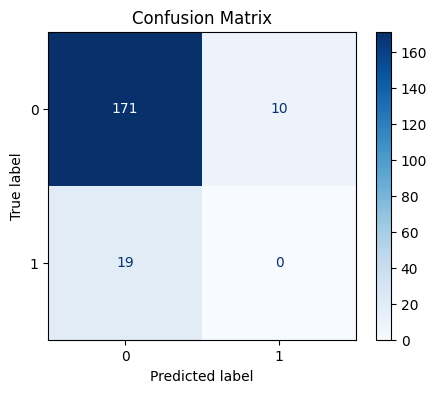

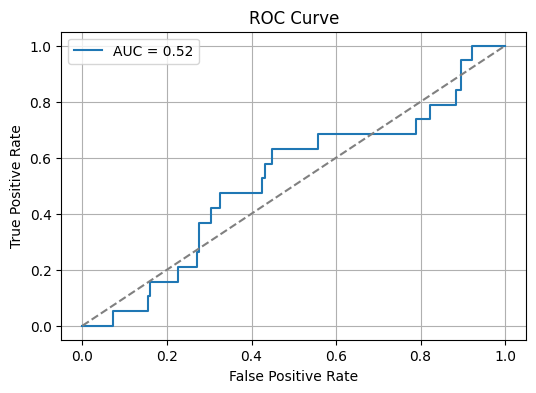

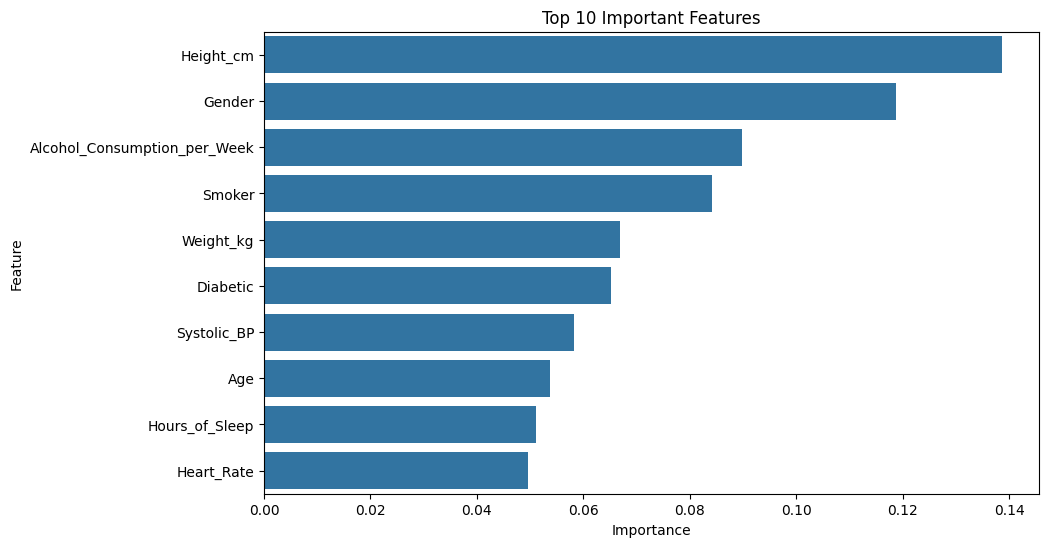

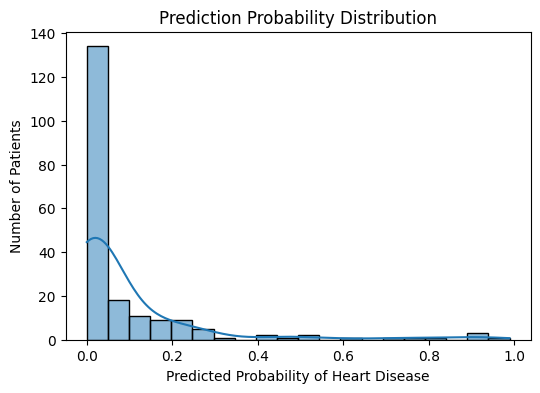

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# 📊 1. Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 📈 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 🔍 3. Feature Importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()

# 📉 4. Prediction Distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=20, kde=True)
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability of Heart Disease")
plt.ylabel("Number of Patients")
plt.show()


In [ ]:
# Save model and scaler
joblib.dump(model, "xgb_heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']